In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv("../marta_thomas_averaged.csv")

In [15]:
df.set_index('gene_id', inplace=True)

In [16]:
df = df.transpose()

In [17]:
df.index

Index(['HCEC_WT', 'HME_WT', 'HBC3', 'HBC3-P', 'HBC3-KP', 'HBC3-T1', 'HBC3-T2',
       'HBC3-T3', 'HBC3-T4'],
      dtype='object')

In [18]:
healthy_data = df.loc[["HCEC_WT", "HME_WT", "HBC3"]]

In [19]:
scaler = StandardScaler()


In [20]:
#standartization
X_std = scaler.fit_transform(healthy_data.values)

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


In [22]:
print(pca.explained_variance_ratio_)

[0.62832251 0.37167749]


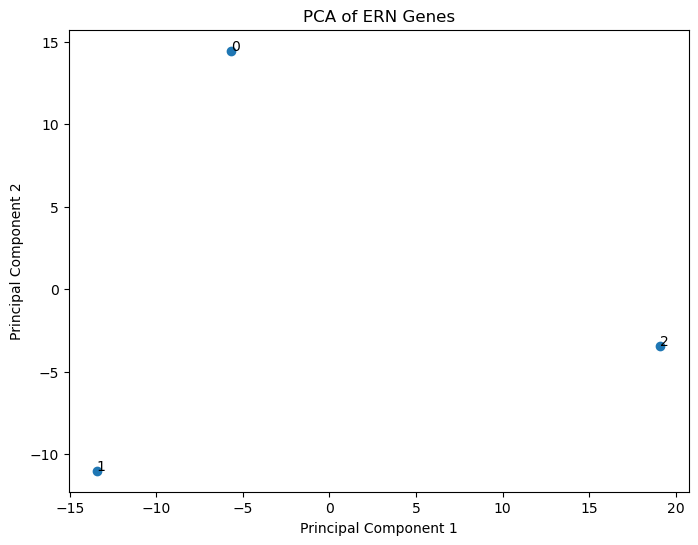

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['PC1'], principalDf['PC2'])
for i, txt in enumerate(principalDf.index):
    plt.annotate(txt, (principalDf['PC1'][i], principalDf['PC2'][i]))
plt.title('PCA of ERN Genes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

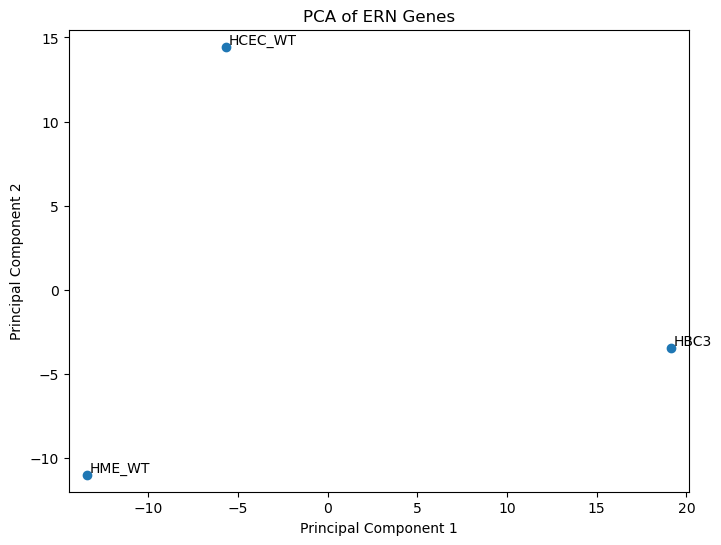

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['PC1'], principalDf['PC2'])

#defining offsets
x_offset = 0.15  
y_offset = 0.15  

for i, txt in enumerate(healthy_data.index):
    plt.annotate(txt, (principalDf['PC1'][i] + x_offset, principalDf['PC2'][i] + y_offset))

plt.xlim(principalDf['PC1'].min() - 1, principalDf['PC1'].max() + 1)
plt.ylim(principalDf['PC2'].min() - 1, principalDf['PC2'].max() + 1)

plt.title('PCA of ERN Genes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
cancer_data = df.loc[[ 'HBC3-P', 'HBC3-KP', 'HBC3-T1', 'HBC3-T2',
       'HBC3-T3', 'HBC3-T4']]

In [26]:
X_cancer_std = scaler.transform(cancer_data)

/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [27]:
X_cancer_pca = pca.transform(X_cancer_std)

In [28]:
cancer_principalDf = pd.DataFrame(data=X_cancer_pca, columns=['PC1', 'PC2'])


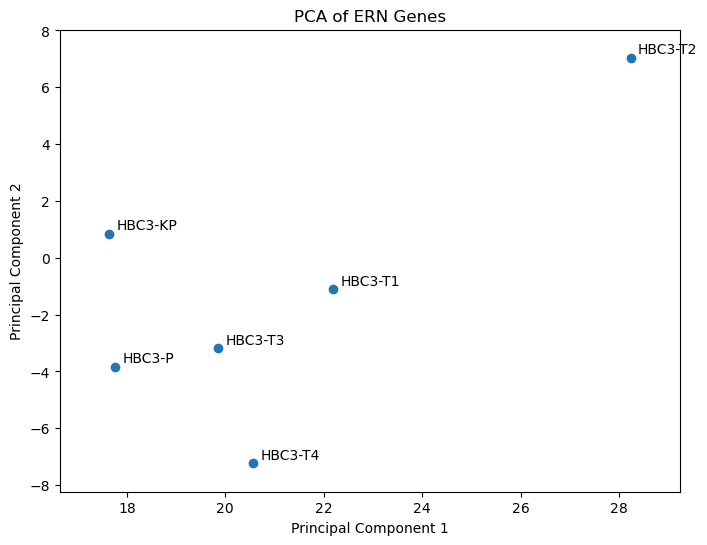

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(cancer_principalDf['PC1'], cancer_principalDf['PC2'])

#defining offsets
x_offset = 0.15  
y_offset = 0.15  

for i, txt in enumerate(cancer_data.index):
    plt.annotate(txt, (cancer_principalDf['PC1'][i] + x_offset, cancer_principalDf['PC2'][i] + y_offset))

plt.xlim(cancer_principalDf['PC1'].min() - 1, cancer_principalDf['PC1'].max() + 1)
plt.ylim(cancer_principalDf['PC2'].min() - 1, cancer_principalDf['PC2'].max() + 1)

plt.title('PCA of ERN Genes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

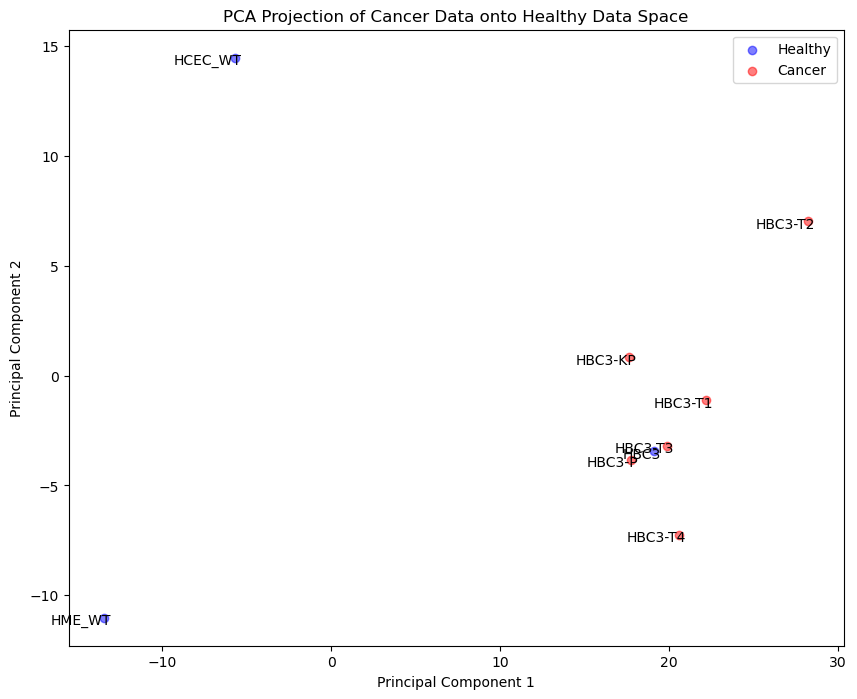

In [18]:
#PCA of both cancer and healthy data
plt.figure(figsize=(10, 8))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5, label='Healthy')
for i, label in enumerate(healthy_data.index):
    plt.annotate(label, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(5,-5), ha='right')


plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c='red', alpha=0.5, label='Cancer')
for i, label in enumerate(cancer_data.index):
    plt.annotate(label, (X_cancer_pca[i, 0], X_cancer_pca[i, 1]), textcoords="offset points", xytext=(5,-5), ha='right')

plt.title('PCA Projection of Cancer Data onto Healthy Data Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()

# Show the plot
plt.show()

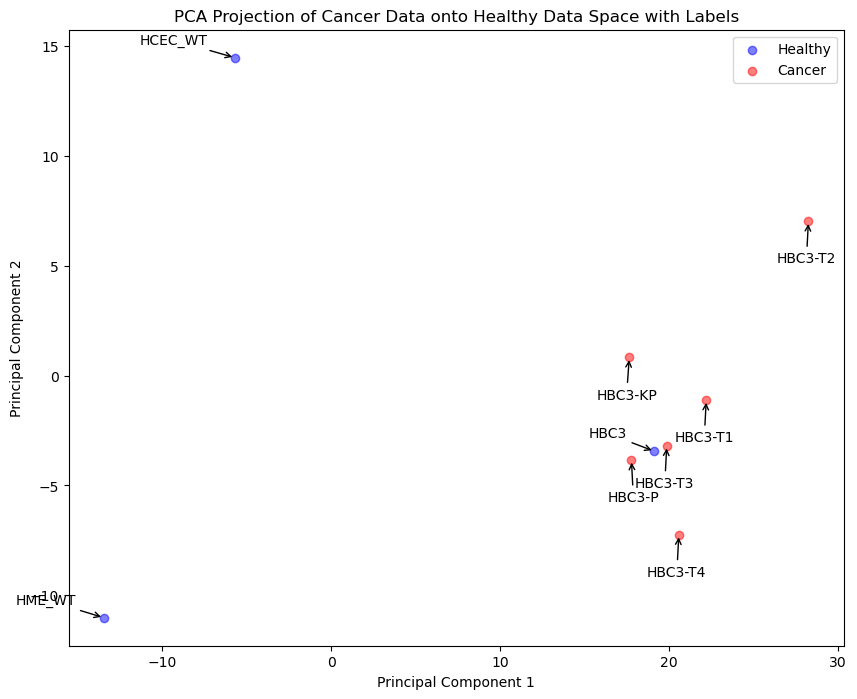

In [30]:
plt.figure(figsize=(10, 8))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5, label='Healthy')

for i, label in enumerate(healthy_data.index):
    plt.annotate(label, 
                 xy=(X_pca[i, 0], X_pca[i, 1]), 
                 xytext=(-20, 10),
                 textcoords="offset points", 
                 ha='right',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c='red', alpha=0.5, label='Cancer')

for i, label in enumerate(cancer_data.index):
    plt.annotate(label, 
                 xy=(X_cancer_pca[i, 0], X_cancer_pca[i, 1]), 
                 xytext=(20, -30),
                 textcoords="offset points", 
                 ha='right',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.title('PCA Projection of Cancer Data onto Healthy Data Space with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()

plt.show()

In [42]:
X_healthy_cancer = np.vstack((X_pca, X_cancer_pca))


**Clustering**

In [39]:
from sklearn.cluster import KMeans

k = 2  

kmeans_all = KMeans(n_clusters=k, random_state=42)
clusters_all = kmeans_all.fit_predict(X_healthy_cancer)

/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


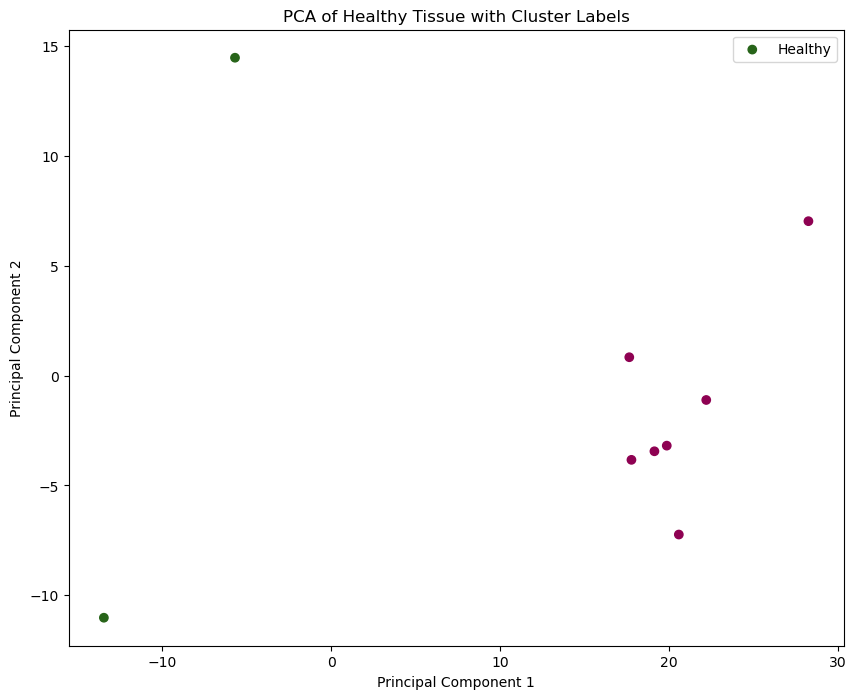

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(X_healthy_cancer[:, 0], X_healthy_cancer[:, 1], c=clusters_all, cmap='PiYG', label='Healthy')
plt.title('PCA of Healthy Tissue with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


How should I cluster them? 

In [43]:
loadings = pca.components_.T

loading_matrix = pd.DataFrame(loadings, index=df.columns, columns=['PC1', 'PC2'])

In [44]:
top_genes_pc1 = loading_matrix.nlargest(10, 'PC1')  # Top 10 for PC1
top_genes_pc2 = loading_matrix.nlargest(10, 'PC2')  # Top 10 for PC2

In [45]:
print("Top contributing genes to PC1:")
print(top_genes_pc1)
print("\nTop contributing genes to PC2:")
print(top_genes_pc2)

Top contributing genes to PC1:
               PC1       PC2
gene_id                     
KMT2D     0.072000 -0.000616
SIRT6     0.071999  0.000651
MTA2      0.071987 -0.001850
KDM5B     0.071977  0.002426
HIST1H1E  0.071958 -0.003251
BAZ2B     0.071910  0.004712
CDYL      0.071897 -0.005022
SIRT5     0.071842  0.006213
L3MBTL1   0.071830 -0.006456
SMYD3     0.071815  0.006729

Top contributing genes to PC2:
              PC1       PC2
gene_id                    
SMARCD2  0.000365  0.093614
PRDM9    0.002870  0.093541
HDAC7   -0.003213  0.093522
ATRX     0.005365  0.093355
ATAD2B  -0.007689  0.093080
PHF1    -0.008197  0.093007
PRMT2   -0.009045  0.092874
SUV39H2 -0.009921  0.092723
ZMYND11 -0.010142  0.092682
SETMAR  -0.010188  0.092674
